In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: dataset/captions.csv    
   creating: dataset/images/
  inflating: dataset/images/1.jpg    
  inflating: dataset/images/1_cheering_1.jpg  
  inflating: dataset/images/1_cheering_2.jpg  
  inflating: dataset/images/1_cheering_3.jpg  
  inflating: dataset/images/10.jpg   
  inflating: dataset/images/10_presenting_1.jpg  
  inflating: dataset/images/10_presenting_2.jpg  
  inflating: dataset/images/10_presenting_3.jpg  
  inflating: dataset/images/11.jpg   
  inflating: dataset/images/11_floating_1.jpg  
  inflating: dataset/images/11_floating_2.jpg  
  inflating: dataset/images/11_floating_3.jpg  
  inflating: dataset/images/12.jpg   
  inflating: dataset/images/12_laptop_1.jpg  
  inflating: dataset/images/12_laptop_2.jpg  
  inflating: dataset/images/12_laptop_3.jpg  
  inflating: dataset/images/13 - Copy (2).jpg  
  inflating: dataset/images/13 - Copy (3).jpg  
  inflating: dataset/images/13 - Copy.jpg  
  inflating: dataset/images/13.jpg   
  inflat

In [ ]:
!pip install datasets

In [ ]:
import pandas as pd

df = pd.read_csv("dataset/captions.csv")
print(df.columns)

Index(['Image Path', 'Caption'], dtype='object')


In [ ]:
!git clone https://github.com/huggingface/diffusers

Cloning into 'diffusers'...
remote: Enumerating objects: 98663, done.
remote: Counting objects: 100% (837/837), done.
remote: Compressing objects: 100% (382/382), done.
remote: Total 98663 (delta 670), reused 457 (delta 452), pack-reused 97826 (from 3)
Receiving objects: 100% (98663/98663), 73.83 MiB | 12.03 MiB/s, done.
Resolving deltas: 100% (72732/72732), done.


In [ ]:
%cd diffusers

/content/diffusers


In [ ]:
!pip install -e .

Obtaining file:///content/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.35.0.dev0-0.editable-py3-none-any.whl size=11366 sha256=6ff1449dd9292b09694c155caa56c2d3b7b6ead9d1180e4c0b12137b85348e6d
  Stored in directory: /tmp/pip-ephem-wheel-cache-mr22f68m/wheels/30/15/ca/ab6e88c89d6ba7047b3f155894c6c346e7cf06067fd132ae62
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.34.0
    Uninstalling diffusers-0.34.0:
      Successfully uninstalled diffusers-0.34.0


In [ ]:
!pip install -r examples/text_to_image/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import json
import pandas as pd

df = pd.read_csv("/content/dataset/captions.csv")
df.rename(columns={"Image Path": "image_path", "Caption": "text"}, inplace=True)

image_dir = "/content/train_data_dir"
os.makedirs(image_dir, exist_ok=True)

metadata_path = os.path.join(image_dir, "metadata.jsonl")

with open(metadata_path, "w") as f:
    for _, row in df.iterrows():
        src = f"/content/dataset/images/{os.path.basename(row['image_path'])}"
        dst = os.path.join(image_dir, os.path.basename(row['image_path']))
        if not os.path.exists(dst):
            os.system(f"cp '{src}' '{dst}'")
        f.write(json.dumps({
            "image": os.path.basename(row["image_path"]),
            "text": row["text"]
        }) + "\n")


In [ ]:
from datasets import Dataset
import pandas as pd
df = pd.read_json("/content/train_data_dir/metadata.jsonl", lines=True)
print("Number of examples:", len(df))
dataset = Dataset.from_pandas(df)
print("First example:", dataset[3])

Number of examples: 205
First example: {'image': '1_cheering_3.jpg', 'text': '"sksmascot, she broadly smiles, holding briefcase, cheering."'}


In [ ]:
from datasets import Features, Value, Image
df["image"] = df["image"].apply(lambda x: f"/content/train_data_dir/{x}")
features = Features({"image": Image(), "text": Value("string")})
dataset = Dataset.from_pandas(df, features=features)


In [ ]:
!head -n 5 /content/train_data_dir/metadata.jsonl


{"image": "1.jpg", "text": "\"A 3D animated character of a woman, dressed in a red pantsuit with a dark brown top underneath, stands with her arms raised, holding a black briefcase in her left hand and cheering with her right arm extended upward. She is smiling broadly and looking towards the upper left, with short, dark brown hair and blue eyes.\""}
{"image": "1_cheering_1.jpg", "text": "\"sksmascot, woman cheering with arms raised, holding a briefcase.\""}
{"image": "1_cheering_2.jpg", "text": "\"sksmascot, character with briefcase, arm extended upward, celebrating.\""}
{"image": "1_cheering_3.jpg", "text": "\"sksmascot, she broadly smiles, holding briefcase, cheering.\""}
{"image": "2.jpg", "text": "\"A 3D animated character of a woman, dressed in a red pantsuit with a dark brown top underneath, stands facing forward, holding a blank, light-colored document in her left hand and making an 'OK' sign with her right hand. She is smiling and has short, dark brown hair and blue eyes.\""}


In [ ]:
import os
import json
import pandas as pd
from PIL import Image
from datasets import Dataset, Features, Value, Array3D, Image as HFImage
df = pd.read_csv("/content/dataset/captions.csv")
df.rename(columns={"Image Path": "image_path", "Caption": "text"}, inplace=True)
image_dir = "/content/train_data_dir"
os.makedirs(image_dir, exist_ok=True)
records = []
for _, row in df.iterrows():
    src = f"/content/dataset/images/{row['image_path']}"
    dst = os.path.join(image_dir, row['image_path'])
    if not os.path.exists(dst):
        os.system(f"cp '{src}' '{dst}'")
    records.append({"image": dst, "text": row["text"]})
with open(os.path.join(image_dir, "metadata.jsonl"), "w") as f:
    for r in records:
        f.write(json.dumps(r) + "\n")

In [ ]:
!ls /content/dataset/images | head -10


10.jpg
10_presenting_1.jpg
10_presenting_2.jpg
10_presenting_3.jpg
11_floating_1.jpg
11_floating_2.jpg
11_floating_3.jpg
11.jpg
12.jpg
12_laptop_1.jpg


In [ ]:
import os
import pandas as pd

df = pd.read_csv("/content/dataset/captions.csv")
df.rename(columns={"Image Path": "image", "Caption": "text"}, inplace=True)

missing = []

for path in df["image"]:
    image_name = os.path.basename(path)

    # Fix cases like '1_cheering_3jpg'
    if "jpg" in image_name and not image_name.endswith(".jpg"):
        image_name = image_name.replace("jpg", ".jpg")

    full_path = f"/content/dataset/images/{image_name}"

    if not os.path.exists(full_path):
        missing.append(image_name)

print(f"❌ Total missing: {len(missing)}")
print("🕵️ Missing image files:", missing)


❌ Total missing: 0
🕵️ Missing image files: []


In [ ]:
!head -n 5 /content/train_data_dir/metadata.jsonl

{"image": "/content/dataset/images/1.jpg", "text": "\"A 3D animated character of a woman, dressed in a red pantsuit with a dark brown top underneath, stands with her arms raised, holding a black briefcase in her left hand and cheering with her right arm extended upward. She is smiling broadly and looking towards the upper left, with short, dark brown hair and blue eyes.\""}
{"image": "/content/dataset/images/1_cheering_1.jpg", "text": "\"sksmascot, woman cheering with arms raised, holding a briefcase.\""}
{"image": "/content/dataset/images/1_cheering_2.jpg", "text": "\"sksmascot, character with briefcase, arm extended upward, celebrating.\""}
{"image": "/content/dataset/images/1_cheering_3.jpg", "text": "\"sksmascot, she broadly smiles, holding briefcase, cheering.\""}
{"image": "/content/dataset/images/2.jpg", "text": "\"A 3D animated character of a woman, dressed in a red pantsuit with a dark brown top underneath, stands facing forward, holding a blank, light-colored document in her 

In [ ]:
import pandas as pd
from datasets import Dataset, Features, Value, Image as HFImage

# Load metadata
df = pd.read_json("/content/train_data_dir/metadata.jsonl", lines=True)

# Correct image paths only if not already absolute
df["image"] = df["image"].apply(lambda x: x if x.startswith("/") else f"/content/train_data_dir/{x}")

# Define dataset features
features = Features({"image": HFImage(), "text": Value("string")})

# Build and save dataset
dataset = Dataset.from_pandas(df, features=features)
dataset.save_to_disk("/content/processed_dataset")

print("🎉 Clean dataset saved to /content/processed_dataset")


Saving the dataset (0/1 shards):   0%|          | 0/205 [00:00<?, ? examples/s]

🎉 Clean dataset saved to /content/processed_dataset


In [ ]:
from datasets import load_from_disk
import os
print("Directory exists:", os.path.exists("/content/processed_dataset"))
try:
    dataset = load_from_disk("/content/processed_dataset")
    print("\nDataset loaded successfully!")
    print("Columns:", dataset["train"].column_names)
    print("First example image size:", dataset["train"][0]["image"].size)
    print("First example text:", dataset["train"][0]["text"])
except Exception as e:
    print("\nError loading dataset:", e)
    print("\nDirectory contents:")
    !ls -la /content/processed_dataset

Directory exists: True

Dataset loaded successfully!

Error loading dataset: Column 'train' doesn't exist.

Directory contents:
total 4476
drwxr-xr-x 2 root root    4096 Jul 18 08:49 .
drwxr-xr-x 1 root root    4096 Jul 18 08:49 ..
-rw-r--r-- 1 root root 4566968 Jul 18 08:49 data-00000-of-00001.arrow
-rw-r--r-- 1 root root     210 Jul 18 08:49 dataset_info.json
-rw-r--r-- 1 root root     247 Jul 18 08:49 state.json


In [ ]:
!rm -rf /root/.cache/huggingface/accelerate/default_config.yaml
!accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [ ]:
from datasets import load_from_disk
dataset = load_from_disk("/content/processed_dataset")
print(dataset)

Dataset({
    features: ['image', 'text'],
    num_rows: 205
})


In [ ]:
!ls /content/dataset/images | head -5
!head /content/dataset/captions.csv

10.jpg
10_presenting_1.jpg
10_presenting_2.jpg
10_presenting_3.jpg
11_floating_1.jpg
Image Path,Caption
/content/dataset/images/1.jpg,"""A 3D animated character of a woman, dressed in a red pantsuit with a dark brown top underneath, stands with her arms raised, holding a black briefcase in her left hand and cheering with her right arm extended upward. She is smiling broadly and looking towards the upper left, with short, dark brown hair and blue eyes."""
/content/dataset/images/1_cheering_1.jpg,"""sksmascot, woman cheering with arms raised, holding a briefcase."""
/content/dataset/images/1_cheering_2.jpg,"""sksmascot, character with briefcase, arm extended upward, celebrating."""
/content/dataset/images/1_cheering_3.jpg,"""sksmascot, she broadly smiles, holding briefcase, cheering."""
/content/dataset/images/2.jpg,"""A 3D animated character of a woman, dressed in a red pantsuit with a dark brown top underneath, stands facing forward, holding a blank, light-colored document in her left 

In [ ]:
import os

folder = "/content/train_data_dir"
files = os.listdir(folder)
print("Total files:", len(files))
print("Example:", files[:5])


Total files: 206
Example: ['30.jpg', '25_pensive_1.jpg', '50_highfive_1.jpg', '15 - Copy (2).jpg', '38_close_up_phone_2.jpg']


In [ ]:
!mkdir -p /content/train_data_dir/images
!cp /content/dataset/images/*.jpg /content/train_data_dir/images/

In [ ]:
import os

image_dir = "/content/train_data_dir/images"
if os.path.exists(image_dir) and len(os.listdir(image_dir)) > 0:
    print(f"Found {len(os.listdir(image_dir))} image files!")
    print("Sample:", os.listdir(image_dir)[:5])
else:
    print(" Still empty or missing!")


Found 205 image files!
Sample: ['30.jpg', '25_pensive_1.jpg', '50_highfive_1.jpg', '15 - Copy (2).jpg', '38_close_up_phone_2.jpg']


In [ ]:
import os
import pandas as pd
from PIL import Image
print("Files in /content/train_data_dir:")
print(os.listdir("/content/train_data_dir"))
images_dir = "/content/train_data_dir/images"
if os.path.exists(images_dir):
    print("\nFirst 5 images in images folder:")
    print(os.listdir(images_dir)[:5])
else:
    print("\nNo images folder found - creating one")
    os.makedirs(images_dir, exist_ok=True)

Files in /content/train_data_dir:
['30.jpg', '25_pensive_1.jpg', '50_highfive_1.jpg', '15 - Copy (2).jpg', '38_close_up_phone_2.jpg', '22 - Copy.jpg', '52_writing_1.jpg', '45 - Copy.jpg', '3 - Copy.jpg', '53.jpg', '29 - Copy (2).jpg', '34 - Copy.jpg', '42.jpg', '15 - Copy.jpg', '9.jpg', '29 - Copy (3).jpg', '50_highfive_2.jpg', '12_laptop_3.jpg', '40 - Copy.jpg', '28_celebrate_1.jpg', '39_stressed_1.jpg', '21.jpg', '47.jpg', '21_shocked_hands_2.jpg', '24 - Copy (2).jpg', '37 - Copy.jpg', '35_demure_2.jpg', '39.jpg', '8.jpg', '6.jpg', '26_leaning_2.jpg', '41_ok_gesture_3.jpg', '12.jpg', '33.jpg', '37.jpg', '13 - Copy (2).jpg', '34.jpg', '46 - Copy (2).jpg', '26_leaning_3.jpg', '16 - Copy (2).jpg', '54_lounging_2.jpg', '15.jpg', '44 - Copy (3).jpg', '7.jpg', '14_write_air_2.jpg', '50_highfive_3.jpg', '25_pensive_2.jpg', '44 - Copy.jpg', '3 - Copy (3).jpg', '14.jpg', '14_write_air_3.jpg', '25.jpg', '39_stressed_2.jpg', '43.jpg', '36.jpg', '10_presenting_1.jpg', '55_sitting_3.jpg', '28.jpg

In [ ]:
import os
import pandas as pd
from shutil import copy
source_dir = "/content/dataset"
target_dir = "/content/train_data_dir"
os.makedirs(os.path.join(target_dir, "images"), exist_ok=True)
df = pd.read_csv(os.path.join(source_dir, "captions.csv"))
df = df.rename(columns={"Image Path": "file_name", "Caption": "text"})
df["file_name"] = df["file_name"].apply(lambda x: os.path.basename(x))
df["text"] = df["text"].str.strip().str.replace('"', '')
df.to_csv(os.path.join(target_dir, "captions.csv"), index=False)
print("Captions file processed and saved")
image_files = [f for f in os.listdir(os.path.join(source_dir, "images"))
              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_file in image_files:
    src = os.path.join(source_dir, "images", img_file)
    dst = os.path.join(target_dir, "images", img_file)
    if not os.path.exists(dst):
        copy(src, dst)

print(f"Copied {len(image_files)} images to training directory")
print("\nFinal structure in train_data_dir:")
print(os.listdir(target_dir))
print("\nImages subdirectory:")
print(len(os.listdir(os.path.join(target_dir, "images"))), "images")
print("\nFirst 3 captions:")
print(df.head(3))


Captions file processed and saved
Copied 205 images to training directory

Final structure in train_data_dir:
['30.jpg', '25_pensive_1.jpg', '50_highfive_1.jpg', '15 - Copy (2).jpg', '38_close_up_phone_2.jpg', '22 - Copy.jpg', '52_writing_1.jpg', '45 - Copy.jpg', '3 - Copy.jpg', '53.jpg', '29 - Copy (2).jpg', '34 - Copy.jpg', '42.jpg', '15 - Copy.jpg', '9.jpg', '29 - Copy (3).jpg', '50_highfive_2.jpg', '12_laptop_3.jpg', '40 - Copy.jpg', '28_celebrate_1.jpg', '39_stressed_1.jpg', '21.jpg', '47.jpg', '21_shocked_hands_2.jpg', '24 - Copy (2).jpg', '37 - Copy.jpg', '35_demure_2.jpg', '39.jpg', '8.jpg', '6.jpg', '26_leaning_2.jpg', '41_ok_gesture_3.jpg', '12.jpg', '33.jpg', '37.jpg', '13 - Copy (2).jpg', '34.jpg', '46 - Copy (2).jpg', '26_leaning_3.jpg', '16 - Copy (2).jpg', '54_lounging_2.jpg', '15.jpg', '44 - Copy (3).jpg', '7.jpg', '14_write_air_2.jpg', '50_highfive_3.jpg', '25_pensive_2.jpg', '44 - Copy.jpg', '3 - Copy (3).jpg', '14.jpg', '14_write_air_3.jpg', '25.jpg', '39_stressed_2.

In [ ]:
import os
import pandas as pd
dataset_path = "/content/train_data_dir"
captions_path = os.path.join(dataset_path, "captions.csv")
images_dir = os.path.join(dataset_path, "images")
print("Dataset structure:")
print(f"Captions file exists: {os.path.exists(captions_path)}")
print(f"Images directory exists: {os.path.exists(images_dir)}")
print(f"Number of images: {len(os.listdir(images_dir)) if os.path.exists(images_dir) else 0}")
if os.path.exists(captions_path):
    df = pd.read_csv(captions_path)
    print("\nCaptions file columns:")
    print(df.columns.tolist())
    print("\nFirst 3 entries:")
    print(df.head(3))

Dataset structure:
Captions file exists: True
Images directory exists: True
Number of images: 205

Captions file columns:
['file_name', 'text']

First 3 entries:
          file_name                                               text
0             1.jpg  A 3D animated character of a woman, dressed in...
1  1_cheering_1.jpg  sksmascot, woman cheering with arms raised, ho...
2  1_cheering_2.jpg  sksmascot, character with briefcase, arm exten...


In [ ]:
import pandas as pd

df = pd.read_csv("/content/train_data_dir/captions.csv")
print(" captions.csv loaded successfully!\n")
print(df.head())


 captions.csv loaded successfully!

          file_name                                               text
0             1.jpg  A 3D animated character of a woman, dressed in...
1  1_cheering_1.jpg  sksmascot, woman cheering with arms raised, ho...
2  1_cheering_2.jpg  sksmascot, character with briefcase, arm exten...
3  1_cheering_3.jpg  sksmascot, she broadly smiles, holding briefca...
4             2.jpg  A 3D animated character of a woman, dressed in...


In [ ]:
!ls /content/train_data_dir/

 10.jpg			    26_leaning_2.jpg	     '44 - Copy (3).jpg'
 10_presenting_1.jpg	    26_leaning_3.jpg	     '44 - Copy.jpg'
 10_presenting_2.jpg	    27.jpg		      44.jpg
 10_presenting_3.jpg	    28_celebrate_1.jpg	     '45 - Copy (2).jpg'
 11_floating_1.jpg	    28_celebrate_2.jpg	     '45 - Copy (3).jpg'
 11_floating_2.jpg	    28_celebrate_3.jpg	     '45 - Copy.jpg'
 11_floating_3.jpg	    28.jpg		      45.jpg
 11.jpg			   '29 - Copy (2).jpg'	     '46 - Copy (2).jpg'
 12.jpg			   '29 - Copy (3).jpg'	     '46 - Copy (3).jpg'
 12_laptop_1.jpg	   '29 - Copy.jpg'	     '46 - Copy.jpg'
 12_laptop_2.jpg	    29.jpg		      46.jpg
 12_laptop_3.jpg	   '2 - Copy (2).jpg'	      47_board_lean_1.jpg
'13 - Copy (2).jpg'	   '2 - Copy (3).jpg'	      47_board_lean_2.jpg
'13 - Copy (3).jpg'	   '2 - Copy.jpg'	      47_board_lean_3.jpg
'13 - Copy.jpg'		    2.jpg		      47.jpg
 13.jpg			    30.jpg		      48_board_point_1.jpg
 14.jpg			    30_tablet_1.jpg	      48_board_point_2.jpg
 14_write_air_1.jpg	    30_tablet

In [ ]:
import pandas as pd
df = pd.read_csv("/content/train_data_dir/captions.csv")
print(df.head())

          file_name                                               text
0             1.jpg  A 3D animated character of a woman, dressed in...
1  1_cheering_1.jpg  sksmascot, woman cheering with arms raised, ho...
2  1_cheering_2.jpg  sksmascot, character with briefcase, arm exten...
3  1_cheering_3.jpg  sksmascot, she broadly smiles, holding briefca...
4             2.jpg  A 3D animated character of a woman, dressed in...


In [ ]:
!apt install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (631 kB/s)
Selecting previously unselected package tree.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
CAPTIONS_PATH = "/content/train_data_dir/captions.csv"
IMAGES_SOURCE_DIR = "/content/dataset/images"
TRAIN_DATA_DIR = "/content/train_data_dir"

print("Checking files exist:")
print(f"Captions file exists: {os.path.exists(CAPTIONS_PATH)}")
print(f"Images directory exists: {os.path.exists(IMAGES_SOURCE_DIR)}")

os.makedirs(f"{TRAIN_DATA_DIR}/images", exist_ok=True)

df = pd.read_csv(CAPTIONS_PATH)
df = df.rename(columns={"Image Path": "file_name", "Caption": "text"})
df["file_name"] = df["file_name"].apply(lambda x: "images/" + x.split("/")[-1])
df["text"] = df["text"].str.strip().str.replace('"', '')
df.to_csv(f"{TRAIN_DATA_DIR}/metadata.csv", index=False)

if not os.listdir(f"{TRAIN_DATA_DIR}/images"):
    for img in os.listdir(IMAGES_SOURCE_DIR):
        src = f"{IMAGES_SOURCE_DIR}/{img}"
        dst = f"{TRAIN_DATA_DIR}/images/{img}"
        shutil.copy(src, dst)

print("\nFinal structure:")
!tree {TRAIN_DATA_DIR} -L 2

print("\nFirst 3 entries:")
!head -n 3 {TRAIN_DATA_DIR}/metadata.csv

print("\nImage count:", len(os.listdir(f"{TRAIN_DATA_DIR}/images")))


Checking files exist:
Captions file exists: True
Images directory exists: True

Final structure:
/content/train_data_dir
├── 10.jpg
├── 10_presenting_1.jpg
├── 10_presenting_2.jpg
├── 10_presenting_3.jpg
├── 11_floating_1.jpg
├── 11_floating_2.jpg
├── 11_floating_3.jpg
├── 11.jpg
├── 12.jpg
├── 12_laptop_1.jpg
├── 12_laptop_2.jpg
├── 12_laptop_3.jpg
├── 13 - Copy (2).jpg
├── 13 - Copy (3).jpg
├── 13 - Copy.jpg
├── 13.jpg
├── 14.jpg
├── 14_write_air_1.jpg
├── 14_write_air_2.jpg
├── 14_write_air_3.jpg
├── 15 - Copy (2).jpg
├── 15 - Copy (3).jpg
├── 15 - Copy.jpg
├── 15.jpg
├── 16 - Copy (2).jpg
├── 16 - Copy (3).jpg
├── 16 - Copy.jpg
├── 16.jpg
├── 17_crouch_surprise_1.jpg
├── 17_crouch_surprise_2.jpg
├── 17_crouch_surprise_3.jpg
├── 17.jpg
├── 18_headset_1.jpg
├── 18_headset_2.jpg
├── 18_headset_3.jpg
├── 18.jpg
├── 19_board_peek_1.jpg
├── 19_board_peek_2.jpg
├── 19_board_peek_3.jpg
├── 19.jpg
├── 1_cheering_1.jpg
├── 1_cheering_2.jpg
├── 1_cheering_3.jpg
├── 1.jpg
├── 20 - Copy (2).jpg

In [ ]:
!nvidia-smi || echo "Running on CPU"
!free -h

/bin/bash: line 1: nvidia-smi: command not found
Running on CPU
               total        used        free      shared  buff/cache   available
Mem:            12Gi       2.5Gi       3.0Gi       2.0Mi       7.2Gi       9.9Gi
Swap:             0B          0B          0B


In [ ]:
import os
import json
from PIL import Image

dataset_dir = "/content/train_data_dir"
os.makedirs(f"{dataset_dir}/images", exist_ok=True)

with open(f"{dataset_dir}/metadata.jsonl", "w") as f:
    for img_file in os.listdir("/content/dataset/images"):
        if img_file.endswith(('.jpg', '.png')):
            caption = f"mascot image {img_file.split('.')[0]}"
            f.write(json.dumps({"file_name": img_file, "text": caption}) + "\n")

            img = Image.open(f"/content/dataset/images/{img_file}")
            img = img.resize((384, 384))  # Reduced resolution
            img.save(f"{dataset_dir}/images/{img_file}")

print(f" Prepared {len(os.listdir(f'{dataset_dir}/images'))} images")

 Prepared 205 images


In [ ]:
!rm -f /content/train_data_dir/metadata.jsonl

In [ ]:
!ls -la /content/train_data_dir/metadata.*

-rw-r--r-- 1 root root 30040 Jul 18 08:53 /content/train_data_dir/metadata.csv


In [ ]:
!rm -rf /content/train_data_dir/metadata.*

In [ ]:
import pandas as pd

df = pd.read_csv("/content/train_data_dir/captions.csv")
print("Columns:", df.columns.tolist())
print(df.head())


Columns: ['file_name', 'text']
          file_name                                               text
0             1.jpg  A 3D animated character of a woman, dressed in...
1  1_cheering_1.jpg  sksmascot, woman cheering with arms raised, ho...
2  1_cheering_2.jpg  sksmascot, character with briefcase, arm exten...
3  1_cheering_3.jpg  sksmascot, she broadly smiles, holding briefca...
4             2.jpg  A 3D animated character of a woman, dressed in...


In [ ]:
df.rename(columns={"Image Path": "file_name", "Caption": "text"}, inplace=True)

In [ ]:
import pandas as pd

df = pd.read_csv("/content/train_data_dir/captions.csv")
print("Columns in captions.csv:", df.columns.tolist())


Columns in captions.csv: ['file_name', 'text']


In [ ]:
import pandas as pd
import json
import os

csv_path = "/content/train_data_dir/captions.csv"
df = pd.read_csv(csv_path)
df.columns = ["file_name", "text"]
df["file_name"] = df["file_name"].apply(lambda x: os.path.basename(str(x)))
with open("/content/train_data_dir/metadata.jsonl", "w") as f:
    for _, row in df.iterrows():
        json.dump({"file_name": row["file_name"], "text": row["text"]}, f)
        f.write("\n")
print("Fixed metadata.jsonl written")

Fixed metadata.jsonl written


In [ ]:
mv /content/train_data_dir/fixed_metadata.jsonl /content/train_data_dir/metadata.jsonl

mv: cannot stat '/content/train_data_dir/fixed_metadata.jsonl': No such file or directory


In [ ]:
!head /content/train_data_dir/metadata.jsonl


{"file_name": "1.jpg", "text": "A 3D animated character of a woman, dressed in a red pantsuit with a dark brown top underneath, stands with her arms raised, holding a black briefcase in her left hand and cheering with her right arm extended upward. She is smiling broadly and looking towards the upper left, with short, dark brown hair and blue eyes."}
{"file_name": "1_cheering_1.jpg", "text": "sksmascot, woman cheering with arms raised, holding a briefcase."}
{"file_name": "1_cheering_2.jpg", "text": "sksmascot, character with briefcase, arm extended upward, celebrating."}
{"file_name": "1_cheering_3.jpg", "text": "sksmascot, she broadly smiles, holding briefcase, cheering."}
{"file_name": "2.jpg", "text": "A 3D animated character of a woman, dressed in a red pantsuit with a dark brown top underneath, stands facing forward, holding a blank, light-colored document in her left hand and making an 'OK' sign with her right hand. She is smiling and has short, dark brown hair and blue eyes."}


In [ ]:
import os

print("\nFiles directly in /content/train_data_dir:")
print(sorted([f for f in os.listdir("/content/train_data_dir") if f.endswith(".jpg")]))

print("\nFiles in /content/train_data_dir/images:")
print(sorted(os.listdir("/content/train_data_dir/images"))[:10])  # show just first 10



Files directly in /content/train_data_dir:
['1.jpg', '10.jpg', '10_presenting_1.jpg', '10_presenting_2.jpg', '10_presenting_3.jpg', '11.jpg', '11_floating_1.jpg', '11_floating_2.jpg', '11_floating_3.jpg', '12.jpg', '12_laptop_1.jpg', '12_laptop_2.jpg', '12_laptop_3.jpg', '13 - Copy (2).jpg', '13 - Copy (3).jpg', '13 - Copy.jpg', '13.jpg', '14.jpg', '14_write_air_1.jpg', '14_write_air_2.jpg', '14_write_air_3.jpg', '15 - Copy (2).jpg', '15 - Copy (3).jpg', '15 - Copy.jpg', '15.jpg', '16 - Copy (2).jpg', '16 - Copy (3).jpg', '16 - Copy.jpg', '16.jpg', '17.jpg', '17_crouch_surprise_1.jpg', '17_crouch_surprise_2.jpg', '17_crouch_surprise_3.jpg', '18.jpg', '18_headset_1.jpg', '18_headset_2.jpg', '18_headset_3.jpg', '19.jpg', '19_board_peek_1.jpg', '19_board_peek_2.jpg', '19_board_peek_3.jpg', '1_cheering_1.jpg', '1_cheering_2.jpg', '1_cheering_3.jpg', '2 - Copy (2).jpg', '2 - Copy (3).jpg', '2 - Copy.jpg', '2.jpg', '20 - Copy (2).jpg', '20 - Copy (3).jpg', '20 - Copy.jpg', '20.jpg', '21.jpg

In [ ]:
import os
import shutil

src_dir = "/content/train_data_dir"
dst_dir = "/content/train_data_dir/images"
os.makedirs(dst_dir, exist_ok=True)
moved = 0
for file in os.listdir(src_dir):
    if file.endswith(".jpg"):
        src = os.path.join(src_dir, file)
        dst = os.path.join(dst_dir, file)
        if not os.path.exists(dst):
            shutil.move(src, dst)
            moved += 1

print(f"Moved {moved} image files into /images folder.")


Moved 0 image files into /images folder.


In [ ]:
import os
import json

metadata_path = "/content/train_data_dir/metadata.jsonl"
image_folder = "/content/train_data_dir"

missing_files = []

with open(metadata_path, "r") as f:
    for line in f:
        item = json.loads(line)
        image_path = os.path.join(image_folder, item["file_name"])
        if not os.path.exists(image_path):
            missing_files.append(item["file_name"])

print("Missing files:", missing_files)
print("Total missing:", len(missing_files))


Missing files: []
Total missing: 0


In [ ]:
!ls /content/diffusers/examples/text_to_image/

README.md		    test_text_to_image.py
README_sdxl.md		    train_text_to_image_flax.py
requirements_flax.txt	    train_text_to_image_lora.py
requirements_sdxl.txt	    train_text_to_image_lora_sdxl.py
requirements.txt	    train_text_to_image.py
test_text_to_image_lora.py  train_text_to_image_sdxl.py


In [ ]:
!head -n 3 /content/train_data_dir/metadata.jsonl

{"file_name": "1.jpg", "text": "A 3D animated character of a woman, dressed in a red pantsuit with a dark brown top underneath, stands with her arms raised, holding a black briefcase in her left hand and cheering with her right arm extended upward. She is smiling broadly and looking towards the upper left, with short, dark brown hair and blue eyes."}
{"file_name": "1_cheering_1.jpg", "text": "sksmascot, woman cheering with arms raised, holding a briefcase."}
{"file_name": "1_cheering_2.jpg", "text": "sksmascot, character with briefcase, arm extended upward, celebrating."}


In [ ]:
!find /content -name "train_text_to_image_lora.py"

/content/diffusers/examples/research_projects/lora/train_text_to_image_lora.py
/content/diffusers/examples/research_projects/scheduled_huber_loss_training/text_to_image/train_text_to_image_lora.py
/content/diffusers/examples/text_to_image/train_text_to_image_lora.py


In [ ]:
%cd /content

/content


In [ ]:
!pip install --upgrade huggingface_hub

In [ ]:
!pip install --upgrade diffusers --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.3/147.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.

In [ ]:
c

  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.2 MB/s eta 0:00:00
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached safetensors-0.5.3-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
  Using cached huggingface_hub-0.33.4-py3-none-any.whl.metadata (14 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.7.0-py3-none-any.whl.metadata (12 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached typing_extensions-4.14.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached hf_xet-1.1.5-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (879 bytes)
  Using cached setuptools-80.9.0-py3-none-any.whl

In [ ]:
!ps aux | grep 'train_text_to_image'

root        6441  0.0  0.0   7376  3548 ?        S    09:04   0:00 /bin/bash -c ps aux | grep 'train_text_to_image'
root        6443  0.0  0.0   6616  2264 ?        S    09:04   0:00 grep train_text_to_image


In [ ]:
!ps aux | grep 'train_text_to_image_lora.py'

root        6456  0.0  0.0   7376  3452 ?        S    09:04   0:00 /bin/bash -c ps aux | grep 'train_text_to_image_lora.py'
root        6458  0.0  0.0   6628  2332 ?        S    09:04   0:00 grep train_text_to_image_lora.py


In [ ]:
# Clean install of required versions
!pip uninstall -y xformers
!pip uninstall -y torch torchvision diffusers huggingface_hub

!pip install torch==2.0.1+cpu torchvision==0.15.2+cpu --index-url https://download.pytorch.org/whl/cpu
!pip install diffusers==0.26.3
!pip install transformers safetensors huggingface_hub==0.20.3


Found existing installation: torch 2.0.1+cpu
Uninstalling torch-2.0.1+cpu:
  Successfully uninstalled torch-2.0.1+cpu
Found existing installation: torchvision 0.15.2+cpu
Uninstalling torchvision-0.15.2+cpu:
  Successfully uninstalled torchvision-0.15.2+cpu
Found existing installation: diffusers 0.26.3
Uninstalling diffusers-0.26.3:
  Successfully uninstalled diffusers-0.26.3
Found existing installation: huggingface-hub 0.23.0
Uninstalling huggingface-hub-0.23.0:
  Successfully uninstalled huggingface-hub-0.23.0
Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.0.1%2Bcpu-cp311-cp311-linux_x86_64.whl (195.4 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.15.2%2Bcpu-cp311-cp311-linux_x86_64.whl (1.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
accelerate 0.30.1 requires

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Optional: turn off xFormers manually just to be safe
import os
os.environ["USE_XFORMERS"] = "0"

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float32
).to("cpu")

print("Model loaded successfully!")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Model loaded successfully!


In [ ]:
!ls /content/diffusers/examples/text_to_image/train_text_to_image_lora.py

/content/diffusers/examples/text_to_image/train_text_to_image_lora.py


In [ ]:
!rm -rf /content/diffusers
!git clone https://github.com/huggingface/diffusers
%cd diffusers
!pip install -e .

Cloning into 'diffusers'...
remote: Enumerating objects: 98663, done.
remote: Counting objects: 100% (840/840), done.
remote: Compressing objects: 100% (380/380), done.
remote: Total 98663 (delta 673), reused 462 (delta 457), pack-reused 97823 (from 3)
Receiving objects: 100% (98663/98663), 73.97 MiB | 13.13 MiB/s, done.
Resolving deltas: 100% (72736/72736), done.
/content/diffusers
Obtaining file:///content/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.35.0.dev0-0.editable-py3-none-any.whl size=11366 sha256=0a8028f30ca5879dc34a1f8bd24c683c0fc6af16bf579f400d8cfbd6519b28a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-_5wjm829/wheels/30/15/ca/ab6e88c89d6ba7047b3f155894c6c346e7cf06067fd132ae62
Successfull

In [ ]:
!pip install -U xformers --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 51.6 MB/s eta 0:00:00


In [ ]:
import xformers
print(xformers.__version__)

    PyTorch 2.7.1+cu118 with CUDA 1108 (you have 2.7.1+cu126)
    Python  3.9.23 (you have 3.11.13)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


0.0.31.post1


In [ ]:
!pip install "numpy<2" --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 57.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.7.0 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.1 which is incompatible.
torchvision 0.21.0+cu124 requires torch==2.6.0, but you have torch 2.7.1 which is incompatible.


In [ ]:
import torch

print(f"GPU available: {torch.cuda.is_available()}")
print(f"Device name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")
print(f"Current device: {torch.device('cuda' if torch.cuda.is_available() else 'cpu')}")

GPU available: True
Device name: Tesla T4
Current device: cuda


In [ ]:
!nvidia-smi
!lscpu

/bin/bash: line 1: nvidia-smi: command not found
Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4399.99
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge m
                          ca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht sysc
                          all nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xt
                          opology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq
                           ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt
               

In [ ]:
!pip uninstall -y numpy torch torchvision torchaudio matplotlib pillow
!rm -rf ~/.cache/pip ~/.cache/torch
!pip install \
    "numpy==1.26.4" \
    "pillow==9.5.0"
!pip install \
    "torch==2.0.1+cpu" \
    "torchvision==0.15.2+cpu" \
    "torchaudio==2.0.2+cpu" \
    --index-url https://download.pytorch.org/whl/cpu
!pip install \
    "matplotlib==3.7.1" \
    "diffusers==0.16.1" \
    "transformers==4.28.1" \
    "accelerate==0.18.0" \
    "peft==0.3.0" \
    "datasets==2.12.0" \
    "huggingface-hub==0.14.1"
try:
    import torchvision
except ImportError:
    !pip install --force-reinstall "torchvision==0.15.2+cpu" --no-deps

import os
os.environ['XFORMERS_DISABLED'] = '1'
os.environ['DISABLE_FLAX'] = '1'
os.environ['MPLBACKEND'] = 'Agg'
try:
    import numpy as np
    import torch
    import torchvision
    import torchaudio
    from PIL import Image

    print("All critical packages imported successfully!")
    print(f"torch: {torch.__version__}")
    print(f"torchvision: {torchvision.__version__}")
    print(f"Pillow: {Image.__version__}")
    from torchvision.io import read_image
    print("torchvision functional test passed!")
except Exception as e:
    print(f"Error: {str(e)}")
    print("Trying alternative solutions...")
    !pip install --force-reinstall "pillow==9.5.0" "torchvision==0.15.2+cpu"

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: torch 2.7.1
Uninstalling torch-2.7.1:
  Successfully uninstalled torch-2.7.1
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Found existing installation: matplotlib 3.10.0
Uninstalling matplotlib-3.10.0:
  Successfully uninstalled matplotlib-3.10.0
Found existing installation: pillow 11.3.0
Uninstalling pillow-11.3.0:
  Successfully uninstalled pillow-11.3.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 35.4 MB/s eta 0:00:00
ERROR: pip's dependency resol

Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 63.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires matplotlib, which is not installed.
xformers 0.0.31.post1 requires torch==2.7.1, but you have torch 2.0.1+cpu which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 5.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3

ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.15.0
ERROR: Could not find a version that satisfies the requirement torchvision==0.15.2+cpu (from versions: 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.20.0, 0.20.1, 0.21.0, 0.22.0, 0.22.1)
ERROR: No matching distribution found for torchvision==0.15.2+cpu
Error: cannot import name 'is_directory' from 'PIL._util' (/usr/local/lib/python3.11/dist-packages/PIL/_util.py)
Trying alternative solutions...
  Using cached Pillow-9.5.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.5 kB)
ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.15.0
ERROR: Could not find a version that satisfies the requirement torchvision==0.15.2+cpu (from versions: 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.20.0, 0.2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
output_dir = "/content/drive/MyDrive/lora_model" # This is your safe place

In [ ]:
c

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.1/367.1 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.3/472.3 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 75.6 MB/s eta 0:00:00


In [ ]:
%cd /content
!rm -rf diffusers

/content


In [ ]:
!pip install --upgrade --no-cache-dir \
  diffusers==0.27.2 \
  transformers==4.38.2 \
  peft==0.10.0 \
  accelerate==0.30.1 \
  huggingface_hub==0.23.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 306.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 185.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.33.4
    Uninstalling huggingface-hub-0.33.4:
      Successfully uninstalled huggingface-hub-0.33.4
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.2
    Uninstalling tokenizers-0.21.2:
      Successfully uninstalled tokenizers-0.21.2
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.34.0

In [ ]:
!pip uninstall -y xformers
!pip uninstall -y torch torchvision diffusers
!pip install torch==2.0.1+cpu torchvision==0.15.2+cpu --index-url https://download.pytorch.org/whl/cpu
!pip install diffusers==0.26.3
!pip install transformers safetensors

Found existing installation: xformers 0.0.31.post1
Uninstalling xformers-0.0.31.post1:
  Successfully uninstalled xformers-0.0.31.post1
Found existing installation: torch 2.0.1+cpu
Uninstalling torch-2.0.1+cpu:
  Successfully uninstalled torch-2.0.1+cpu
Found existing installation: torchvision 0.15.2+cpu
Uninstalling torchvision-0.15.2+cpu:
  Successfully uninstalled torchvision-0.15.2+cpu
Found existing installation: diffusers 0.27.2
Uninstalling diffusers-0.27.2:
  Successfully uninstalled diffusers-0.27.2
Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.0.1%2Bcpu-cp311-cp311-linux_x86_64.whl (195.4 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.15.2%2Bcpu-cp311-cp311-linux_x86_64.whl (1.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 4.1.0 r

In [ ]:
!ls -la "/content/drive/MyDrive/lora_model"

total 4
drwx------ 2 root root 4096 Jul 10 12:42 epoch_1


In [ ]:
# -------------------- COMPLETE RESUME CELL --------------------
from diffusers import UNet2DConditionModel, DDPMScheduler
from peft import PeftModel
import torch
import os

# 1. SET THESE SAME VALUES AS YOUR ORIGINAL TRAINING
model_id = "runwayml/stable-diffusion-v1-5"  # MUST match original
drive_output_dir = "/content/drive/MyDrive/lora_model"  # MUST match original

# 2. Reload base model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
unet = UNet2DConditionModel.from_pretrained(model_id, subfolder="unet").to(device)

# 3. Find latest checkpoint
checkpoints = [f for f in os.listdir(drive_output_dir)
              if f.startswith("epoch_") and f.split("_")[1].isdigit()]
if checkpoints:
    latest_epoch = max([int(f.split("_")[1]) for f in checkpoints])
    resume_path = f"{drive_output_dir}/epoch_{latest_epoch}"

    # 4. Load LoRA weights
    unet = PeftModel.from_pretrained(unet, resume_path)
    print(f"Successfully resumed from epoch {latest_epoch}")
    print(f"Next training epoch: {latest_epoch + 1}")
else:
    print("No checkpoints found - starting from scratch")
    print("Please run original training cells first")

Successfully resumed from epoch 1
Next training epoch: 2


In [ ]:
import os
import torch
import pandas as pd
from PIL import Image
from tqdm.auto import tqdm
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from peft import LoraConfig, get_peft_model
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import DDPMScheduler, UNet2DConditionModel, AutoencoderKL
from google.colab import drive

# -------------------- Setup --------------------
drive.mount('/content/drive', force_remount=True)

# -------------------- Device Config --------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch_dtype = torch.float16 if device.type == "cuda" else torch.float32
print(f"Using device: {device} ({torch_dtype})")

# -------------------- Config --------------------
model_id = "runwayml/stable-diffusion-v1-5"
dataset_path = "/content/train_data_dir"
drive_output_dir = "/content/drive/MyDrive/lora_model"
resolution = 512
train_batch_size = 1
learning_rate = 1e-4
total_epochs = 100
checkpoint_every = 1

os.makedirs(drive_output_dir, exist_ok=True)

# -------------------- Dataset --------------------
class MascotDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir):
        self.image_dir = os.path.join(root_dir, "images")
        self.caption_df = pd.read_csv(os.path.join(root_dir, "captions.csv"))
        self.transform = Compose([
            Resize((resolution, resolution)),
            ToTensor(),
            Normalize([0.5], [0.5])
        ])
        self.image_paths = [os.path.join(self.image_dir, row["file_name"])
                          for _, row in self.caption_df.iterrows()]

    def __len__(self):
        return len(self.caption_df)

    def __getitem__(self, idx):
        with Image.open(self.image_paths[idx]) as img:
            img = img.convert("RGB")
        return {
            "pixel_values": self.transform(img),
            "caption": self.caption_df.iloc[idx]["text"]
        }

# -------------------- Model Loading --------------------
print("Loading models...")
tokenizer = CLIPTokenizer.from_pretrained(model_id, subfolder="tokenizer")  # Added tokenizer
text_encoder = CLIPTextModel.from_pretrained(
    model_id,
    subfolder="text_encoder",
    torch_dtype=torch_dtype
).to(device)
vae = AutoencoderKL.from_pretrained(
    model_id,
    subfolder="vae",
    torch_dtype=torch_dtype
).to(device)
unet = UNet2DConditionModel.from_pretrained(
    model_id,
    subfolder="unet",
    torch_dtype=torch_dtype
).to(device)

# Freeze models
for model in [vae, text_encoder]:
    model.requires_grad_(False)

# -------------------- LoRA Setup --------------------
lora_config = LoraConfig(
    r=32,
    lora_alpha=32,
    target_modules=["to_k", "to_q", "to_v", "to_out.0"],
    lora_dropout=0.1,
    bias="none"
)
unet = get_peft_model(unet, lora_config)
unet.print_trainable_parameters()

# -------------------- Training Prep --------------------
dataset = MascotDataset(dataset_path)
train_dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=train_batch_size,
    shuffle=True,
    num_workers=2 if device.type == "cuda" else 0,
    pin_memory=True if device.type == "cuda" else False
)
optimizer = torch.optim.AdamW(unet.parameters(), lr=learning_rate)
noise_scheduler = DDPMScheduler.from_pretrained(model_id, subfolder="scheduler")

# -------------------- Training Loop --------------------
print("Starting training...")
for epoch in range(total_epochs):
    unet.train()
    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{total_epochs}")

    for step, batch in enumerate(progress_bar):
        pixel_values = batch["pixel_values"].to(device)

        if device.type == "cuda":
            with torch.amp.autocast(device_type="cuda"):
                with torch.no_grad():
                    latents = vae.encode(pixel_values).latent_dist.sample() * 0.18215
                    noise = torch.randn_like(latents)
                    timesteps = torch.randint(
                        0, noise_scheduler.config.num_train_timesteps,
                        (latents.shape[0],), device=device
                    )
                    noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

                    text_inputs = tokenizer(
                        batch["caption"],
                        padding="max_length",
                        max_length=tokenizer.model_max_length,
                        truncation=True,
                        return_tensors="pt"
                    ).to(device)
                    encoder_hidden_states = text_encoder(text_inputs.input_ids)[0]

                model_pred = unet(noisy_latents, timesteps, encoder_hidden_states).sample
                loss = torch.nn.functional.mse_loss(model_pred, noise)
        else:
            with torch.no_grad():
                latents = vae.encode(pixel_values).latent_dist.sample() * 0.18215
                noise = torch.randn_like(latents)
                timesteps = torch.randint(
                    0, noise_scheduler.config.num_train_timesteps,
                    (latents.shape[0],), device=device
                )
                noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

                text_inputs = tokenizer(
                    batch["caption"],
                    padding="max_length",
                    max_length=tokenizer.model_max_length,
                    truncation=True,
                    return_tensors="pt"
                ).to(device)
                encoder_hidden_states = text_encoder(text_inputs.input_ids)[0]

            model_pred = unet(noisy_latents, timesteps, encoder_hidden_states).sample
            loss = torch.nn.functional.mse_loss(model_pred, noise)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        progress_bar.set_postfix({"loss": f"{loss.item():.4f}"})

    # Save checkpoint
    if (epoch + 1) % checkpoint_every == 0:
        save_path = f"{drive_output_dir}/epoch_{epoch + 1}"
        os.makedirs(save_path, exist_ok=True)
        unet.save_pretrained(save_path)
        torch.save(optimizer.state_dict(), f"{save_path}/optimizer.pt")
        print(f"✅ Saved checkpoint to {save_path}")

print("Training complete!")


Mounted at /content/drive
Using device: cpu (torch.float32)
Loading models...
trainable params: 6,377,472 || all params: 865,898,436 || trainable%: 0.7365150154861811
Starting training...


Epoch 1/100:   0%|          | 0/205 [00:00<?, ?it/s]

✅ Saved checkpoint to /content/drive/MyDrive/lora_model/epoch_1


Epoch 2/100:   0%|          | 0/205 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# -------------------- COMPLETE WORKING RESUME CODE --------------------
import os


import torch
import pandas as pd
from PIL import Image
from tqdm.auto import tqdm
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from peft import LoraConfig, PeftModel, get_peft_model
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import DDPMScheduler, UNet2DConditionModel, AutoencoderKL
from google.colab import drive

# -------------------- SETUP --------------------
drive.mount('/content/drive', force_remount=True)

# -------------------- DEVICE CONFIG --------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch_dtype = torch.float16 if device.type == "cuda" else torch.float32
print(f"Using device: {device} ({torch_dtype})")

# -------------------- CONFIG --------------------
model_id = "runwayml/stable-diffusion-v1-5"
dataset_path = "/content/train_data_dir"
drive_output_dir = "/content/drive/MyDrive/lora_model"
resolution = 512
train_batch_size = 1
learning_rate = 1e-4
total_epochs = 100
checkpoint_every = 1

# -------------------- DATASET CLASS --------------------
class MascotDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir):
        self.image_dir = os.path.join(root_dir, "images")
        self.caption_df = pd.read_csv(os.path.join(root_dir, "captions.csv"))
        self.transform = Compose([
            Resize((resolution, resolution)),
            ToTensor(),
            Normalize([0.5], [0.5])
        ])
        self.image_paths = [os.path.join(self.image_dir, row["file_name"])
                          for _, row in self.caption_df.iterrows()]

    def __len__(self):
        return len(self.caption_df)

    def __getitem__(self, idx):
        with Image.open(self.image_paths[idx]) as img:
            img = img.convert("RGB")
        return {
            "pixel_values": self.transform(img),
            "caption": self.caption_df.iloc[idx]["text"]
        }

# -------------------- RESUME SETUP --------------------
checkpoints = sorted(
    [f for f in os.listdir(drive_output_dir) if f.startswith('epoch_')],
    key=lambda x: int(x.split('_')[1])
)

start_epoch = 0
resume_path = None

if checkpoints:
    latest_checkpoint = checkpoints[-1]
    latest_epoch = int(latest_checkpoint.split('_')[1])
    resume_path = os.path.join(drive_output_dir, latest_checkpoint)
    start_epoch = latest_epoch
    print(f"Resuming from {latest_checkpoint} (epoch {latest_epoch})")
else:
    print("No checkpoints found - starting from scratch")

# -------------------- MODEL LOADING --------------------
print("\nLoading models...")
tokenizer = CLIPTokenizer.from_pretrained(model_id, subfolder="tokenizer")
text_encoder = CLIPTextModel.from_pretrained(
    model_id,
    subfolder="text_encoder",
    torch_dtype=torch_dtype
).to(device)
vae = AutoencoderKL.from_pretrained(
    model_id,
    subfolder="vae",
    torch_dtype=torch_dtype
).to(device)
unet = UNet2DConditionModel.from_pretrained(
    model_id,
    subfolder="unet",
    torch_dtype=torch_dtype
).to(device)

# Freeze models
vae.requires_grad_(False)
text_encoder.requires_grad_(False)

# -------------------- LoRA SETUP --------------------
lora_config = LoraConfig(
    r=32,
    lora_alpha=32,
    target_modules=["to_k", "to_q", "to_v", "to_out.0"],
    lora_dropout=0.1,
    bias="none"
)

if resume_path:
    print(f"Loading LoRA weights from {resume_path}...")
    unet = PeftModel.from_pretrained(unet, resume_path)
    # CRITICAL FIX: Ensure trainable parameters
    unet.train()
    for name, param in unet.named_parameters():
        if 'lora' in name.lower():
            param.requires_grad_(True)
else:
    print("Initializing new LoRA weights...")
    unet = get_peft_model(unet, lora_config)

unet.print_trainable_parameters()

# -------------------- OPTIMIZER --------------------
optimizer = torch.optim.AdamW(unet.parameters(), lr=learning_rate)
if resume_path and os.path.exists(f"{resume_path}/optimizer.pt"):
    optimizer.load_state_dict(torch.load(f"{resume_path}/optimizer.pt"))
    print(f"Loaded optimizer state from {resume_path}")

# -------------------- DATASET --------------------
print("\nPreparing dataset...")
dataset = MascotDataset(dataset_path)
train_dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=train_batch_size,
    shuffle=True,
    num_workers=2 if device.type == "cuda" else 0
)

# -------------------- SCHEDULER --------------------
noise_scheduler = DDPMScheduler.from_pretrained(model_id, subfolder="scheduler")

# -------------------- TRAINING LOOP --------------------
print(f"\nStarting training from epoch {start_epoch + 1} to {total_epochs}...")
for epoch in range(start_epoch, total_epochs):
    unet.train()
    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{total_epochs}")

    for step, batch in enumerate(progress_bar):
        pixel_values = batch["pixel_values"].to(device)

        # Forward pass
        with torch.no_grad():
            latents = vae.encode(pixel_values).latent_dist.sample() * 0.18215
            noise = torch.randn_like(latents)
            timesteps = torch.randint(
                0, noise_scheduler.config.num_train_timesteps,
                (latents.shape[0],), device=device
            )
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            text_inputs = tokenizer(
                batch["caption"],
                padding="max_length",
                max_length=tokenizer.model_max_length,
                truncation=True,
                return_tensors="pt"
            ).to(device)
            encoder_hidden_states = text_encoder(text_inputs.input_ids)[0]

        # Predict and compute loss
        model_pred = unet(noisy_latents, timesteps, encoder_hidden_states).sample
        loss = torch.nn.functional.mse_loss(model_pred, noise)

        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        progress_bar.set_postfix({"loss": f"{loss.item():.4f}"})

    # Save checkpoint
    if (epoch + 1) % checkpoint_every == 0:
        save_path = f"{drive_output_dir}/epoch_{epoch + 1}"
        os.makedirs(save_path, exist_ok=True)
        unet.save_pretrained(save_path)
        torch.save(optimizer.state_dict(), f"{save_path}/optimizer.pt")
        print(f"Saved checkpoint to {save_path}")



print("Training complete!")

Mounted at /content/drive
Using device: cpu (torch.float32)
Resuming from epoch_1 (epoch 1)

Loading models...
Loading LoRA weights from /content/drive/MyDrive/lora_model/epoch_1...
trainable params: 6,377,472 || all params: 865,898,436 || trainable%: 0.7365150154861811
Loaded optimizer state from /content/drive/MyDrive/lora_model/epoch_1

Preparing dataset...

Starting training from epoch 2 to 100...


Epoch 2/100:   0%|          | 0/205 [00:00<?, ?it/s]

Saved checkpoint to /content/drive/MyDrive/lora_model/epoch_2


Epoch 3/100:   0%|          | 0/205 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

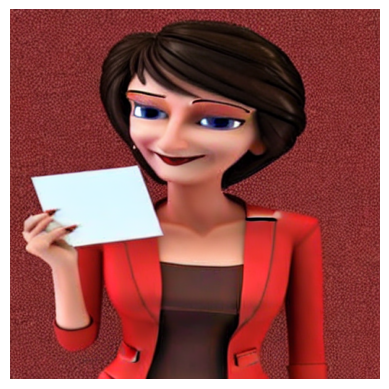

In [ ]:
from diffusers import StableDiffusionPipeline
from peft import PeftModel, PeftConfig
import torch
import matplotlib.pyplot as plt



import os
os.environ['XFORMERS_DISABLED'] = '1'


pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float32,
    safety_checker=None,
    requires_safety_checker=False
).to("cpu")


lora_model_path = "/content/drive/MyDrive/lora_model/epoch_35"
pipe.unet = PeftModel.from_pretrained(
    pipe.unet,
    lora_model_path,
    adapter_name="mascot"
)

pipe.unet.set_adapter("mascot")


prompt = "A 3D animated character of a woman, dressed in a red pantsuit with a dark brown top underneath, stands smiling and holding a blank, light-colored document."

image = pipe(
    prompt,
    num_inference_steps=30,  # Increased for better quality
    guidance_scale=7.5,  # Standard value
    height=512,  # Recommended resolution
    width=512
).images[0]

# 5. Display and save
plt.imshow(image)
plt.axis('off')
plt.show()
image.save("mascot_output.png")